Libraries


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split  

Data Pre-Processing

● Load and inspect the dataset. 

● Handle missing values, feature scaling, and feature selection. 

● Split the data into train and test sets. 

In [38]:
load_data = pd.read_csv('heart.csv')
load_data.head()
finding_missing_values = load_data.isnull().sum()
print(finding_missing_values)
drop_missing_values = load_data.dropna()
print(drop_missing_values.shape)
X = load_data.drop('target', axis=1)   
y = load_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
(1025, 14)
Training set shape: (820, 13) (820,)
Test set shape: (205, 13) (205,)


2. Implement Classification Models 

● Logistic Regression: 

● K-Nearest Neighbors (KNN): 

● Support Vector Machines (SVM) 

● Decision Trees 

● Random Forests. 

● Gradient Boosting 

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'Logistic Regression': (LogisticRegression(max_iter=1000), True),
    'K-Nearest Neighbors': (KNeighborsClassifier(), True),
    'Support Vector Machine': (SVC(), True),
    'Decision Tree': (DecisionTreeClassifier(), False),
    'Random Forest': (RandomForestClassifier(), False),
    'Gradient Boosting': (GradientBoostingClassifier(), False)
}

# Train & Evaluate
for model_name, (model, needs_scaling) in models.items():
    if needs_scaling:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))



Logistic Regression Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

[[73 29]
 [13 90]]

K-Nearest Neighbors Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.80      0.89      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205

[[79 23]
 [11 92]]

Support Vector Machine Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       102
           1       0.85      0.94      0.89       103

    accuracy                     

3. Hyperparameter Tuning

● Use GridSearchCV or RandomizedSearchCV for hyperparameter tuning. 

● Tune parameters like C, k (KNN), max_depth (Decision Tree/Random Forest), and learning_rate (Gradient Boosting). 

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters for Decision Tree:", grid.best_params_)
print("Best Cross-validation Score for Decision Tree:", grid.best_score_)


Best Parameters for Decision Tree: {'max_depth': None, 'min_samples_split': 2}
Best Cross-validation Score for Decision Tree: 0.978048780487805


4. Model Evaluation and Comparison 

● Evaluate all models using accuracy, precision, recall, F1-score, AUC-ROC. 

● Compare models and explain which performed best and why. 

In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Decision Tree Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint



Best Decision Tree Model Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



Model Optimization 

● Apply techniques such as regularization, dropout, and feature engineering to improve 
model performance. 

● Implement ensemble methods like VotingClassifier or StackingClassifier to combine the models and improve accuracy. 

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)

models = {
    'Logistic Regression': (LogisticRegression(max_iter=1000, solver='liblinear'), True),
    'K-Nearest Neighbors': (KNeighborsClassifier(), True),
    'Support Vector Machine': (SVC(probability=True), True),
    'Decision Tree': (DecisionTreeClassifier(), False),
    'Random Forest': (RandomForestClassifier(), False),
    'Gradient Boosting': (GradientBoostingClassifier(), False)
}

for model_name, (model, needs_scaling) in models.items():
    if needs_scaling:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    print(f"\n{model_name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))



Logistic Regression Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

[[73 29]
 [13 90]]

K-Nearest Neighbors Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.80      0.89      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205

[[79 23]
 [11 92]]

Support Vector Machine Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       102
           1       0.85      0.94      0.89       103

    accuracy                     

Visualization

In [43]:
trained_models = {}

for model_name, (model, needs_scaling) in models.items():
    if needs_scaling:
        model.fit(X_train_scaled, y_train)
    else:
        model.fit(X_train, y_train)
    trained_models[model_name] = model  # save fitted model


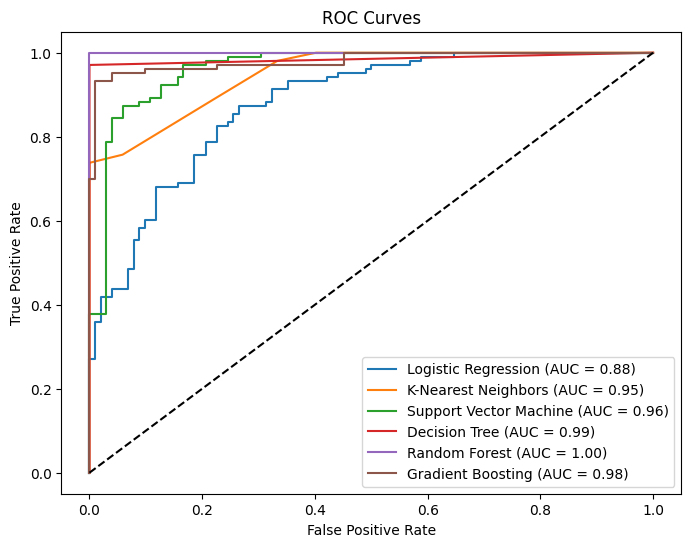

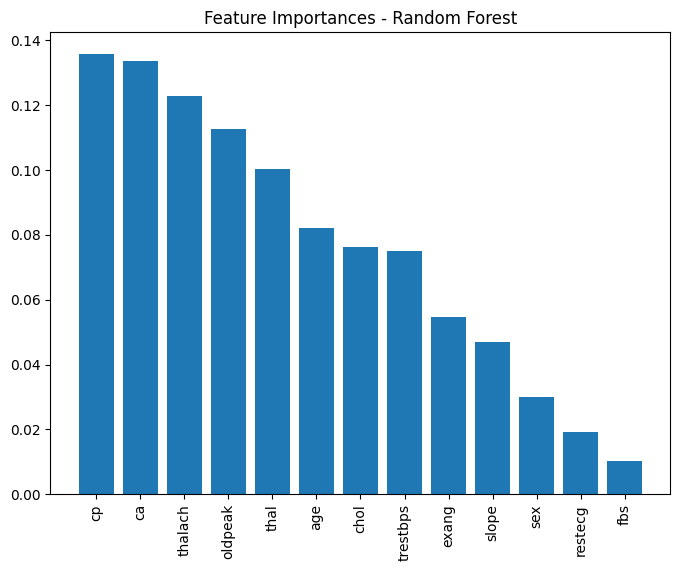

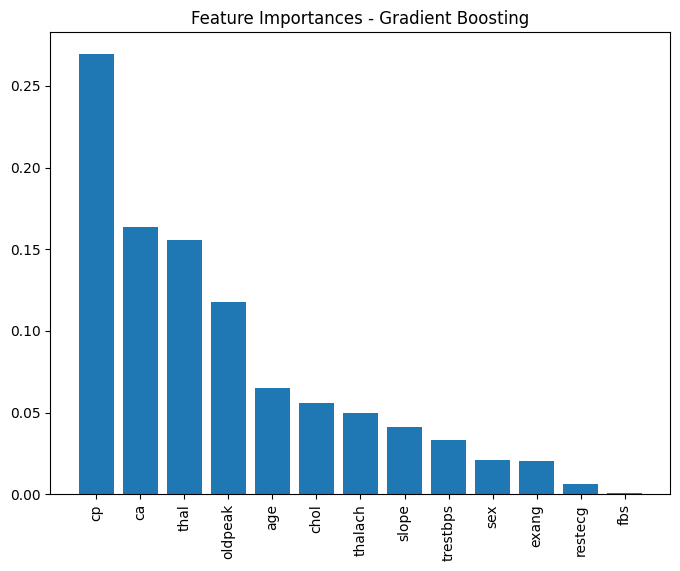

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))
for name, model in trained_models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled if name in ["Logistic Regression","K-Nearest Neighbors","Support Vector Machine"] else X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr,tpr):.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# Feature Importances
for name in ['Random Forest', 'Gradient Boosting']:
    model = trained_models[name]
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(8,6))
    plt.title(f'Feature Importances - {name}')
    plt.bar(range(X.shape[1]), importances[indices])
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
    plt.show()
